In [124]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)    #소수점 이하 둘째 자리까지 표시

In [125]:
# 3개의 예시, 4개의 feature(size, bedrooms, floors and age)
X_train=np.array([[2104,5,1,45],[1416,3,2,40],[852,2,1,35]])
y_train=np.array([460,232,178])

m개의 예시, n개의 특징
X = (m,n) matrix

In [126]:
print(f"X shape : {X_train.shape}, X type : {type(X_train)}")
print(X_train)
print(f"y shape : {y_train.shape}, y type : {type(y_train)}")
print(y_train)

X shape : (3, 4), X type : <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y shape : (3,), y type : <class 'numpy.ndarray'>
[460 232 178]


n개의 feature 만큼 w가 존재해야한다. 하나의 b 값도 존재해야한다. 여기서 w는 vector, b는 scalar이다. 

In [127]:
b_init=785.1811367994083
w_init=np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape : {w_init.shape}, b_init type : {type(b_init)}")

w_init shape : (4,), b_init type : <class 'float'>


선형 회귀 모델을 위해서는 "dot product"를 실행해야한다. dot product를 실행하기 전에 직접 loop로 함수를 만들어 보자.

In [128]:
def predict_single_loop(x,w,b): #x에 뭐가 들어갈까?
    n=x.shape[0]    #첫번째 차원의 크기, 1차원 배열에서는 요소의 수를 나타냄 
    p=0
    for i in range(n):
        p_i=x[i]*w[i]
        p=p+p_i
    p=p+b
    return p

In [129]:
# 3개의 예시 중 첫번째 예시
x_vec = X_train[0,:]
print(f"x_vec shape : {x_vec.shape}, x_vec value : {x_vec}")

f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape : {f_wb.shape}, prediction : {f_wb}")


x_vec shape : (4,), x_vec value : [2104    5    1   45]
f_wb shape : (), prediction : 459.9999976194083


dot product로 predict하기

In [130]:
def predict(x,w,b):
    p=np.dot(x,w)+b
    return p

In [131]:
x_vec = X_train[0,:]
print(f"x_vec shape : {x_vec.shape}, x_vec value : {x_vec}")

f_wb = predict(x_vec, w_init, b_init)
print(f"f_wb shape : {f_wb.shape}, prediction : {f_wb}")

x_vec shape : (4,), x_vec value : [2104    5    1   45]
f_wb shape : (), prediction : 459.99999761940825


직접 for loop로 predict 한 것과 dot product로 predict 한 결과가 같은 것을 확인할 수 있다. 그렇기 때문에 앞으로는 더 간단한 np.dot을 이용할 것이다.  

In [132]:
def compute_cost(X,y,w,b):
    m=X.shape[0]
    cost=0.0
    for i in range(m):
        f_wb_i=np.dot(X[i],w)+b
        cost = cost + (f_wb_i-y[i])**2
    cost = cost/(2*m)
    return cost

In [133]:
cost=compute_cost(X_train, y_train, w_init, b_init)
print(f"Cost at optimal w : {cost}")

Cost at optimal w : 1.5578904880036537e-12


Gradient Descent With Multiple Variables

In [134]:
def compute_gradient(X,y,w,b):
    m,n=X.shape
    dj_dw=np.zeros((n,))
    dj_db=0.

    for i in range(m):
        err=(np.dot(X[i],w)+b) - y[i]
        for j in range(n):
            dj_dw[j]=dj_dw[j]+err*X[i,j]
        dj_db=dj_db+err
    dj_dw=dj_dw/m
    dj_db=dj_db/m

    return dj_db,dj_dw

In [135]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train,y_train,w_init,b_init)
print(f"dj_db at initial w,b: {tmp_dj_db}")
print(f"dj_dw at initial w,b: \n {tmp_dj_dw}")

dj_db at initial w,b: -1.673925169143331e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


In [136]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w=copy.deepcopy(w_in)
    b=b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db

        if i<100000:
            J_history.append(cost_function(X,y,w,b))

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d} : Cost {J_history[-1]:8.2f}    ")
    return w,b,J_history

In [137]:
# w_init과 같은 shape의 행렬에 0의 값을 넣은 행렬 생성
initial_w = np.zeros_like(w_init)
initial_b = 0.

iterations=1000
alpha=5.0e-7
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f}, {w_final}")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final)+b_final:0.2f}, target value: {y_train[i]}")

Iteration    0 : Cost  2529.46    
Iteration  100 : Cost   695.99    
Iteration  200 : Cost   694.92    
Iteration  300 : Cost   693.86    
Iteration  400 : Cost   692.81    
Iteration  500 : Cost   691.77    
Iteration  600 : Cost   690.73    
Iteration  700 : Cost   689.71    
Iteration  800 : Cost   688.70    
Iteration  900 : Cost   687.69    
b,w found by gradient descent: -0.00, [ 0.2   0.   -0.01 -0.07]
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


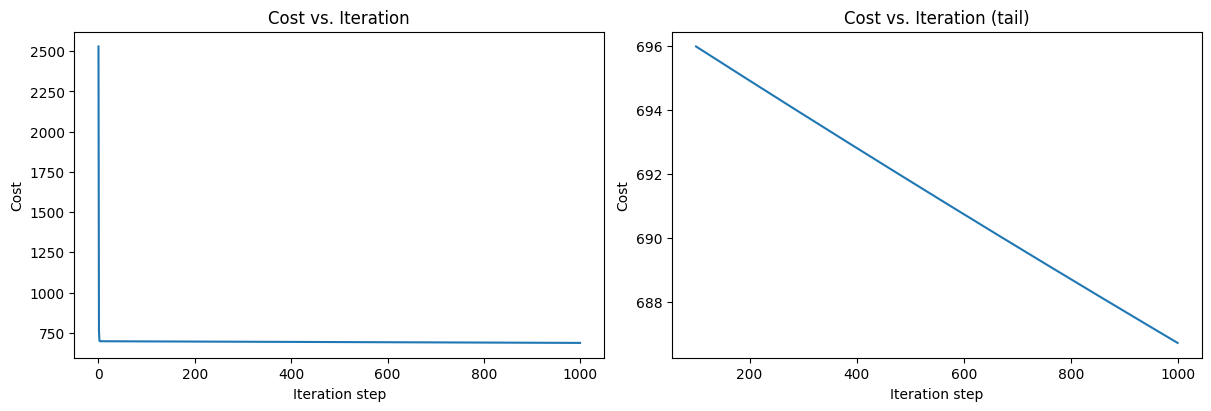

In [138]:
fig, (ax1, ax2) = plt.subplots(1,2,constrained_layout=True, figsize=(16,10))
ax1.plot(J_hist)
ax2.plot(100+np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. Iteration")
ax2.set_title("Cost vs. Iteration (tail)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('Iteration step')
ax2.set_xlabel('Iteration step')
plt.show()